In [1]:
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set"
CATEGORIES = ["cats", "dogs"]

folder:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/dogs

img_name:
dog.869.jpg

img_path:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/dogs/dog.869.jpg

img_arr:
[[[ 48  48  72]
  [ 52  53  74]
  [ 52  53  74]
  ...
  [ 51  58  78]
  [ 59  66  86]
  [ 54  61  81]]

 [[ 55  55  79]
  [ 57  58  79]
  [ 54  55  76]
  ...
  [ 41  48  68]
  [ 44  51  71]
  [ 50  57  77]]

 [[ 49  49  73]
  [ 55  56  77]
  [ 54  55  76]
  ...
  [ 41  46  67]
  [ 37  42  63]
  [ 48  53  74]]

 ...

 [[203 209 220]
  [197 203 214]
  [203 209 220]
  ...
  [204 206 214]
  [214 216 224]
  [219 221 229]]

 [[195 201 212]
  [192 198 209]
  [196 202 213]
  ...
  [213 215 223]
  [225 227 235]
  [226 228 236]]

 [[186 192 203]
  [187 193 204]
  [188 194 205]
  ...
  [213 215 223]
  [223 225 233]
  [223 225 233]]]

resized_img_arr:
[[[ 55  56  77]
  [ 37  41  54]
  [ 43  45  53]
  ...
  [ 35  36  50]
  [ 40  45  65]
  [ 39  44  65]]

 [[ 62  63  84]
  [ 39  43  56]
  [ 47  49  57]


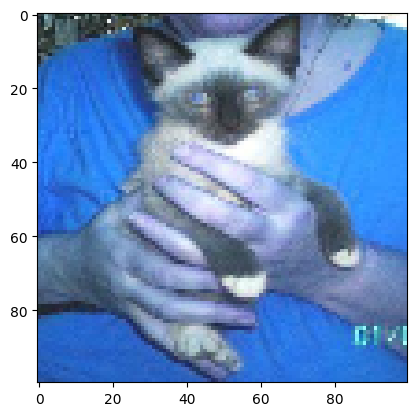

In [5]:
"""
Just for learn
"""
IMG_SIZE = 100
fake_dataset = []
for category in CATEGORIES:
# for category in CATEGORIES[::-1]:
    folder = os.path.join(DIRECTORY, category)
    print(f"folder:\n{folder}\n")
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img_arr = cv2.imread(img_path)
        resized_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        plt.imshow(resized_img_arr)
        
        label = 0 if category == "cats" else 1
        fake_dataset.append([resized_img_arr, label])
        print(f"img_name:\n{img_name}\n")
        print(f"img_path:\n{img_path}\n")
        print(f"img_arr:\n{img_arr}\n")
        print(f"resized_img_arr:\n{resized_img_arr}\n")
        break
print(fake_dataset)

folder:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/cats

folder:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/dogs



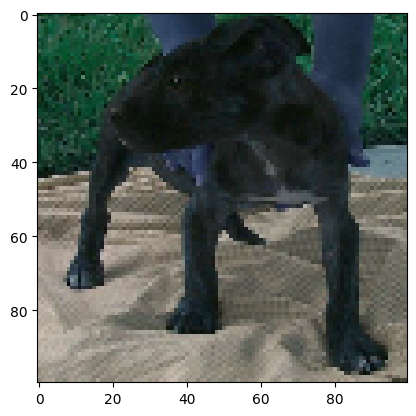

In [6]:
IMG_SIZE = 100
dataset = []

def create_dataset(img_name):
    img_path = os.path.join(folder, img_name)
    img_arr = cv2.imread(img_path)
    resized_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))        
    label = 0 if category == "cats" else 1
    dataset.append([resized_img_arr, label])
    
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    img_names_list = os.listdir(folder)
    list(map(create_dataset, img_names_list))

In [7]:
len(img_arr)

499

In [8]:
len(resized_img_arr)

100

In [9]:
dataset[0]

[array([[[ 65,  69,  72],
         [ 48,  68,  73],
         [133, 168, 173],
         ...,
         [244, 244, 237],
         [255, 254, 253],
         [255, 253, 255]],
 
        [[ 36,  42,  50],
         [ 19,  43,  49],
         [148, 184, 191],
         ...,
         [254, 252, 251],
         [252, 254, 254],
         [248, 254, 255]],
 
        [[ 66,  74,  83],
         [ 18,  40,  46],
         [ 98, 132, 137],
         ...,
         [246, 254, 252],
         [254, 255, 250],
         [255, 255, 248]],
 
        ...,
 
        [[ 27,  79, 167],
         [ 34,  87, 174],
         [ 27,  80, 170],
         ...,
         [ 41, 106, 200],
         [ 38, 101, 193],
         [ 38,  99, 189]],
 
        [[ 35,  80, 161],
         [ 32,  79, 160],
         [ 38,  85, 167],
         ...,
         [ 34,  99, 193],
         [ 40, 103, 195],
         [ 39, 101, 191]],
 
        [[ 42,  83, 156],
         [ 45,  85, 160],
         [ 36,  79, 154],
         ...,
         [ 41, 107, 200],
  

In [10]:
len(dataset)

8000

In [11]:
random.shuffle(dataset)

In [12]:
features = []
labels = []

for f, l in dataset:
    features.append(f)
    labels.append(l)

In [13]:
features = np.array(features)
labels = np.array(labels)

In [ ]:
features

array([[[[ 10,  24,  18],
         [ 11,  25,  19],
         [  5,  19,  13],
         ...,
         [ 32,  53,  51],
         [ 19,  24,  23],
         [ 35,  37,  35]],

        [[ 10,  24,  18],
         [  7,  21,  15],
         [ 23,  37,  31],
         ...,
         [ 52,  89,  91],
         [ 26,  58,  58],
         [ 32,  59,  53]],

        [[  8,  22,  16],
         [ 11,  25,  19],
         [ 13,  27,  21],
         ...,
         [ 57,  86,  97],
         [ 61,  95, 100],
         [  8,  38,  33]],

        ...,

        [[ 54,  93,  69],
         [ 51,  89,  64],
         [ 47,  86,  61],
         ...,
         [ 97, 126, 110],
         [ 96, 140, 121],
         [ 86, 135, 115]],

        [[ 14,  42,  22],
         [ 44,  73,  53],
         [ 17,  48,  28],
         ...,
         [152, 165, 151],
         [121, 146, 131],
         [ 36,  68,  51]],

        [[ 45,  75,  56],
         [ 42,  73,  54],
         [ 43,  75,  56],
         ...,
         [173, 176, 167],
        

In [14]:
features = features / 255

In [15]:
features

array([[[[0.03921569, 0.09411765, 0.07058824],
         [0.04313725, 0.09803922, 0.0745098 ],
         [0.01960784, 0.0745098 , 0.05098039],
         ...,
         [0.1254902 , 0.20784314, 0.2       ],
         [0.0745098 , 0.09411765, 0.09019608],
         [0.1372549 , 0.14509804, 0.1372549 ]],

        [[0.03921569, 0.09411765, 0.07058824],
         [0.02745098, 0.08235294, 0.05882353],
         [0.09019608, 0.14509804, 0.12156863],
         ...,
         [0.20392157, 0.34901961, 0.35686275],
         [0.10196078, 0.22745098, 0.22745098],
         [0.1254902 , 0.23137255, 0.20784314]],

        [[0.03137255, 0.08627451, 0.0627451 ],
         [0.04313725, 0.09803922, 0.0745098 ],
         [0.05098039, 0.10588235, 0.08235294],
         ...,
         [0.22352941, 0.3372549 , 0.38039216],
         [0.23921569, 0.37254902, 0.39215686],
         [0.03137255, 0.14901961, 0.12941176]],

        ...,

        [[0.21176471, 0.36470588, 0.27058824],
         [0.2       , 0.34901961, 0.25098039]

In [16]:
labels

array([1, 0, 1, ..., 1, 1, 0])

In [75]:
features.shape

(8000, 100, 100, 3)

In [18]:
len(dataset)

8000

In [19]:
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

2022-12-11 00:47:35.057343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 00:47:39.409011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kiarashfz/Desktop/cat_dog_recognition/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-11 00:47:39.409055: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-11 00:47:47.905447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic lib

In [20]:
# Sequential vaqti estefade mishe ke har layer faqat yek input tensor va yek output tensor dashte bashe
model = Sequential()

# Reshape inputa va outputa ro be shekle tupleii ke behesh midim taghire shekl mide
model.add(Reshape((100,100,3),input_shape=features.shape[1:]))

# Layeii ke convolution anjam mide rooye tike be tikeye image ha => Conv2D(filters, kernel_size)
model.add(Conv2D(64, (3, 3), activation="relu"))

# https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/
model.add(MaxPooling2D(2, 2))

# Flatten vaqti estefade mishe ke outputet chand boOdi shode va mikhay khattish koni ta betuni bedish be laye Dense
model.add(Flatten())

# count of features doesn't matter(100, 100, 3)
# Dense: layeii ke neuron haro ba neuron haye laye haye qabl connect mikone
model.add(Dense(128, input_shape= features.shape[1:], activation="relu"))
model.add(Dense(2, activation="softmax"))

In [21]:
# Adam: ye algorythme optimize
# sparse_categorical_crossentropy: vaqti label haye category bandi shode darim ke mamulan label haii az noe int hastan
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.fit(features, labels, epochs=3, validation_split=0.1)

2022-12-11 00:48:14.605183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 864000000 exceeds 10% of free system memory.


Epoch 1/3


2022-12-11 00:48:20.333744: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 78675968 exceeds 10% of free system memory.


225/225 [==============================] - 77s 326ms/step - loss: 0.9597 - accuracy: 0.5914 - val_loss: 0.6024 - val_accuracy: 0.6712
Epoch 2/3
225/225 [==============================] - 73s 319ms/step - loss: 0.5281 - accuracy: 0.7369 - val_loss: 0.5644 - val_accuracy: 0.7038
Epoch 3/3
225/225 [==============================] - 69s 304ms/step - loss: 0.3753 - accuracy: 0.8335 - val_loss: 0.6452 - val_accuracy: 0.6950


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 153664)            0         
                                                                 
 dense (Dense)               (None, 128)               19669120  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [24]:
def convert_image_path_to_arr(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    return new_arr

In [25]:
dog_path = "/home/kiarashfz/Desktop/dog.jpeg"
dog_arr = convert_image_path_to_arr(dog_path)

In [26]:
prediction = model.predict([dog_arr])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 1s 930ms/step
dogs


In [28]:
cat_path = "/home/kiarashfz/Desktop/cat.jpeg"
cat_arr = convert_image_path_to_arr(cat_path)


prediction = model.predict([cat_arr])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 37ms/step
cats
